**Import Libraries**

In [45]:
import pandas as pd

In [46]:
import numpy as np

In [47]:
import seaborn as sns

In [48]:
import matplotlib.pyplot as plt

**Set Seed**

In [49]:
seed = 42
np.random.seed(seed)

**Upload DataSet**

In [50]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv


Specify separator as semicolon while reading the data from the csv file.

In [51]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']),sep=';')

In [52]:
# Take a look the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



**Exploratory Data Analysis for Categorical Attributes**


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Before we preprocess our dataset, we need to find hidden issues and relationships using basic exploratory data analysis and data profiling.

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


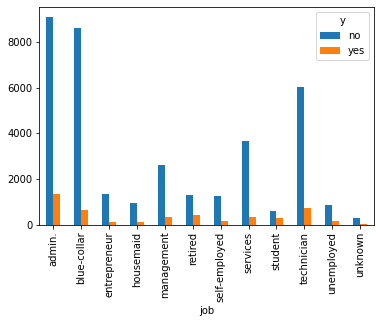

In [54]:
# Cross tabulation between Job Type and whether Client subscribed or not
CrosstabResult_job=pd.crosstab(index=df['job'],columns=df['y'])
print(CrosstabResult_job)

# Grouped bar chart between Job Type and whether Client subscribed or not
CrosstabResult_job.plot.bar()

**Insight** - There are very few unknowns in job type. These unknowns are essentially missing values in our dataset. This information was not successfully captured by the info() method we used earlier. 

However, we do see a huge imbalance in the dataset with students, housemaids, entrepreneur, retirees, self-emplyed, and unemployed clients making small proportion of total population.

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


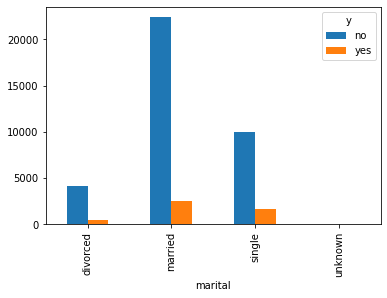

In [55]:
# Cross tabulation between marital status and whether Client subscribed or not
CrosstabResult_marital=pd.crosstab(index=df['marital'],columns=df['y'])
print(CrosstabResult_marital)

# Grouped bar chart between marital status and whether Client subscribed or not
CrosstabResult_marital.plot.bar()

**Insight** - There are very few missing values in the dataset which is clear from the small number of unknowns. 

We need to make the decision whether to keep these values or drop them completely. We might lose several records if there are unkowns in other categorical attributes as well. Since these unknowns may be coming from different set of records for each different categorical attribute.

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


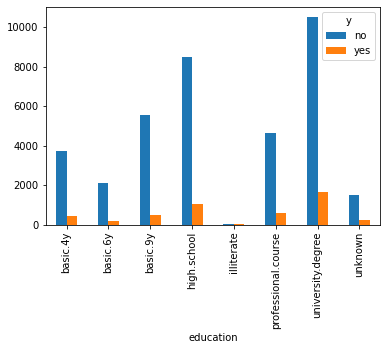

In [56]:
# Cross tabulation between education status and whether Client subscribed or not
CrosstabResult_edu=pd.crosstab(index=df['education'],columns=df['y'])
print(CrosstabResult_edu)

# Grouped bar chart between marital status and whether Client subscribed or not
CrosstabResult_edu.plot.bar()

**Insight** - Around 4% of data values for education are missing in this dataset. Dropping these records will result in losing 4% of our dataset. Not advised.

y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0


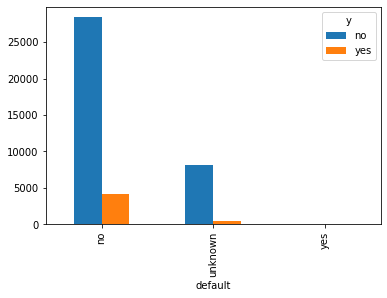

In [57]:
# Cross tabulation between default and whether Client subscribed or not
CrosstabResult_default=pd.crosstab(index=df['default'],columns=df['y'])
print(CrosstabResult_default)

# Grouped bar chart between default and whether Client subscribed or not
CrosstabResult_default.plot.bar()

**Insight** - Surprisingly, we don't have enough records with deafult status 'yes'. However, roughly 21% of data values are unknown and can be considered missing. Since, we have a lot of unknown values in this column, it is advisable to consider 'unknown' as a separate category in itself.

y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507


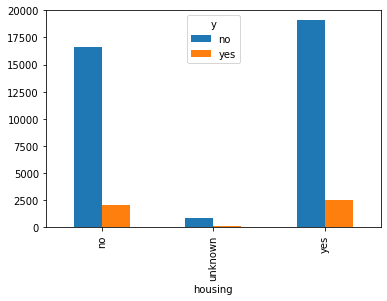

In [58]:
# Cross tabulation between housing loan and whether Client subscribed or not
CrosstabResult_housing=pd.crosstab(index=df['housing'],columns=df['y'])
print(CrosstabResult_housing)

# Grouped bar chart between housing and whether Client subscribed or not
CrosstabResult_housing.plot.bar()

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


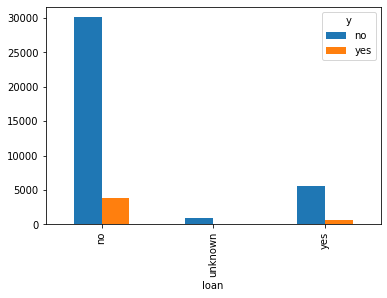

In [59]:
# Cross tabulation between personal loan and whether Client subscribed or not
CrosstabResult_loan=pd.crosstab(index=df['loan'],columns=df['y'])
print(CrosstabResult_loan)

# Grouped bar chart between marital status and whether Client subscribed or not
CrosstabResult_loan.plot.bar()

**Insight** - Roughly 2.5% of data values are missing in personal loan and housing loan columns. Dropping these records could be one option. Need to check how many records will be lost in total and whether using unknown as a separate category is essential for predicting the final outcome.

y             no   yes
contact               
cellular   22291  3853
telephone  14257   787


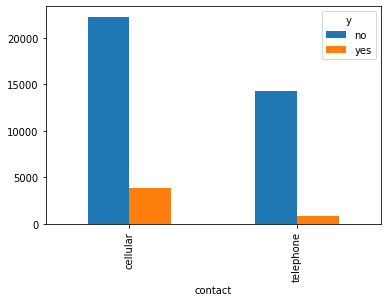

In [60]:
# Cross tabulation between contact and whether Client subscribed or not
CrosstabResult_contact=pd.crosstab(index=df['contact'],columns=df['y'])
print(CrosstabResult_contact)

# Grouped bar chart between contact and whether Client subscribed or not
CrosstabResult_contact.plot.bar()

y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


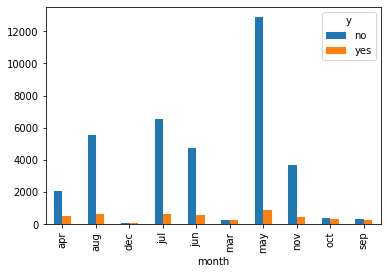

In [61]:
# Cross tabulation between contact month and whether Client subscribed or not
CrosstabResult_month=pd.crosstab(index=df['month'],columns=df['y'])
print(CrosstabResult_month)

# Grouped bar chart between contact month and whether Client subscribed or not
CrosstabResult_month.plot.bar()

y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949


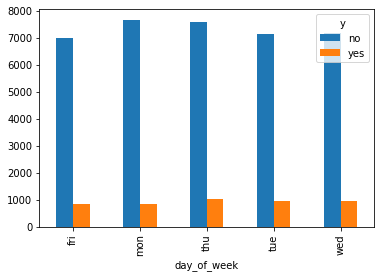

In [62]:
# Cross tabulation between day_of_week and whether Client subscribed or not
CrosstabResult_day_of_week=pd.crosstab(index=df['day_of_week'],columns=df['y'])
print(CrosstabResult_day_of_week)

# Grouped bar chart between day_of_week and whether Client subscribed or not
CrosstabResult_day_of_week.plot.bar()

**Insight** - There are no missing values for columns - day_of_week, month, and contact type. 

y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


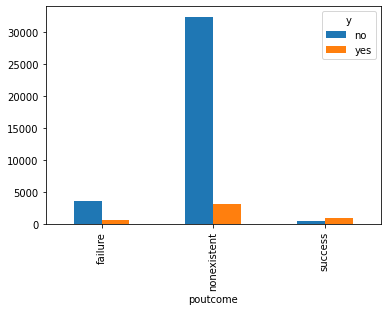

In [63]:
# Cross tabulation between outcome of previous campaign and whether Client subscribed or not
CrosstabResult_poutcome=pd.crosstab(index=df['poutcome'],columns=df['y'])
print(CrosstabResult_poutcome)

# Grouped bar chart between outcome of previous campaign and whether Client subscribed or not
CrosstabResult_poutcome.plot.bar()

**Insight** - Roughly 86% of outcome of previous campaign does not exist. We need to consider as a separate category in itself.

In [64]:
from scipy.stats import chi2_contingency
# Performing chi-square test
ChiSqResult_housing = chi2_contingency(CrosstabResult_housing)
print('p-value: ', ChiSqResult_housing[1])

p-value:  0.05829447669453452


**Insight** - A p-value of >0.5 indicates that knowing the value of housing loan can help us to predict the subscription outcome.

In [65]:
# Performing chi-square test
ChiSqResult_loan = chi2_contingency(CrosstabResult_loan)
print('p-value: ', ChiSqResult_loan[1])

p-value:  0.5786752870441754


**Insight** - A p-value of >0.5 indicates that knowing the value of personal loan can help us predict the subscription outcome.

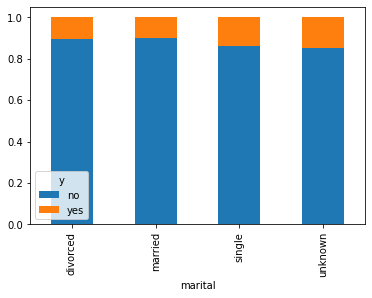

In [66]:
# Count plot between marital status and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["marital"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - Unmarried people are more likely to subscribe than married and divorced. However there are many unknowns so this can't be conclusively deduced for now.

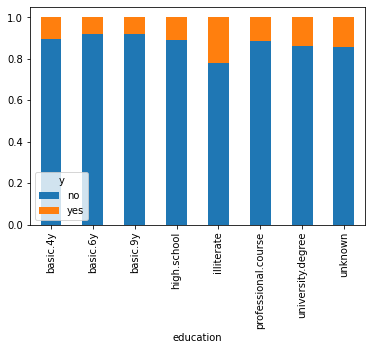

In [67]:
# Count plot between education status and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["education"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - Illiterate people are more likely to subscribe than educated folk. Also, as the level of education increases the propensity to subscribe increases as well.

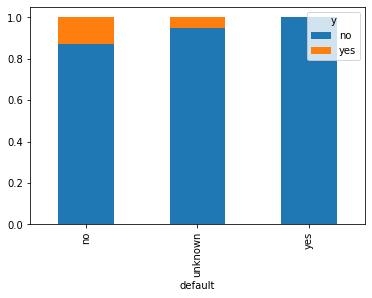

In [68]:
# Count plot between default status and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["default"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - If the credit default occurs, then the client will not subscribe which is intuitive.

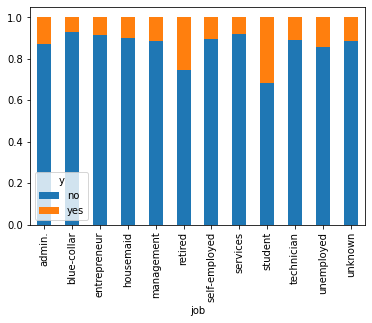

In [69]:
# Count plot between job type and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["job"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - Surprisingly, students and retired people are more likely to subscribe for a term deposit.

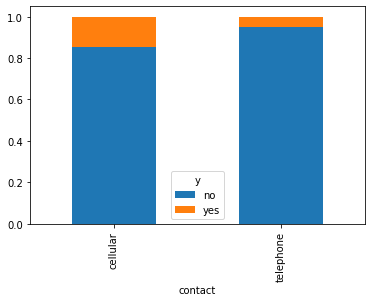

In [70]:
# Count plot between contact type and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["contact"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - Telephonic channel for campaign is not as successful as cellular.


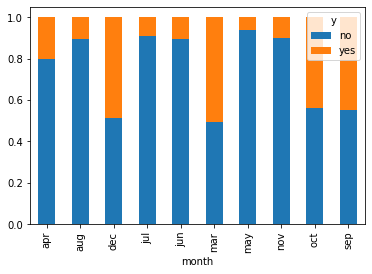

In [71]:
# Count plot between month of campaign and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["month"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - Campagins are most successful in months of Dec, Mar, Oct, and Sep.

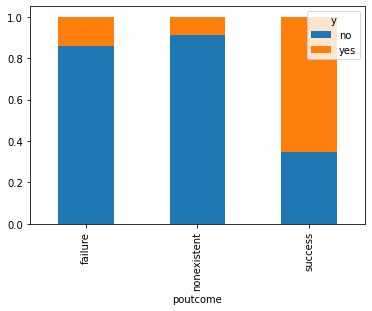

In [72]:
# Count plot between outcome of previous campaign and subscription status
subscription_cross_tab = pd.crosstab(df["y"], df["poutcome"]).transpose()
subscription_cross_tab.div(subscription_cross_tab.sum(axis=1),axis=0).plot(kind = 'bar', stacked=True)

**Insight** - If the outcome of previous campaign was a success then the propensity of that client to subscribe the term deposit is fairly high.

**Summary of Results for Categorical Variables** - 
```markdown
Column Name        |    Missing %     |    Remarks
-------------------|------------------|--------------------
      job          |      0.8%        |     Drop Rows
     marital       |      0.2%        |     Drop Rows
     education     |      4.0%        |  Don't Drop Rows 
     default       |     21.0%        |  Don't Drop Rows
     housing       |      2.5%        | Rows Could be Dropped 
     loan          |      2.5%        | Rows Could be Dropped
     contact       |       0%         |     ---
     month         |       0%         |     ---
     day_of_week   |       0%         |     ---
     poutcome      |      86%         |  Don't Drop Rows

```

**Key Insights** - 
1. Personal loan status and housing loan status are important in predicting the outcome
2. Unmarried people are more likely to subscribe than married and divorced.
3. Illiterate people are more likely to subscribe than educated folk. Also, as the level of education increases the propensity to subscribe increases as well.
4. If the credit default occurs, then the client will not subscribe which is intuitive.
5. Surprisingly, students and retired people are more likely to subscribe for a term deposit.
6. Telephonic channel for campaign is not as successful as cellular.
7. Campagins are most successful in months of Dec, Mar, Oct, and Sep.
8. If the outcome of previous campaign was a success then the propensity of that client to subscribe the term deposit is fairly high.

**Exploratory Data Analysis for Numeric Attributes**

In [73]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



Clearly, describe() method does not provide us discernible insights on the numeric attributes.



In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We have **NO** missing values for numeric variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ccf233e80>,
      dtype=object)

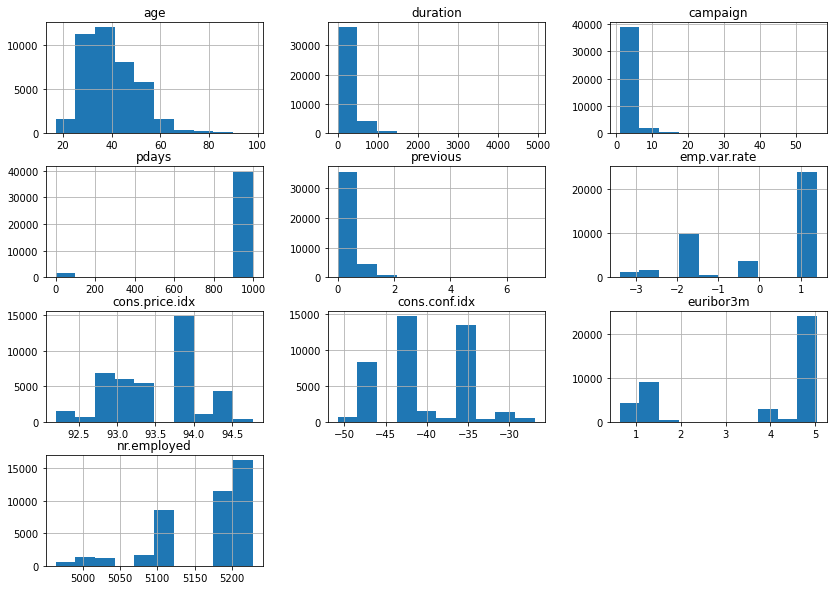

In [75]:
# Histograms
df.hist(figsize=(14,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ccf5bc6d0>,
      dtype=object)

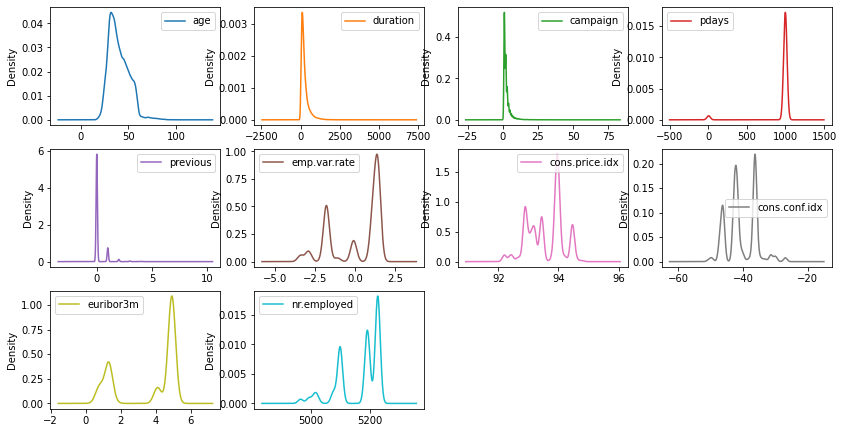

In [76]:
# Density Plot
df.plot(figsize=(14,10), kind='density', subplots=True, layout=(4,4), sharex=False)

**Insights** - 
1. Check if there are only two type of values for pdays. If that is the case, it is better to convert it into categorical attribute.
2. For other numeric attributes, it is apparent from the density plot that there are peaks followed by long tails in some cases or wiggly shaped plots for some other attributes. Thus, for these variables normalization is a necessary data processing step.

age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
duration           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
campaign           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
pdays              AxesSubplot(0.731522,0.71587;0.168478x0.16413)
previous             AxesSubplot(0.125,0.518913;0.168478x0.16413)
emp.var.rate      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
cons.price.idx    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
cons.conf.idx     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
euribor3m            AxesSubplot(0.125,0.321957;0.168478x0.16413)
nr.employed       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

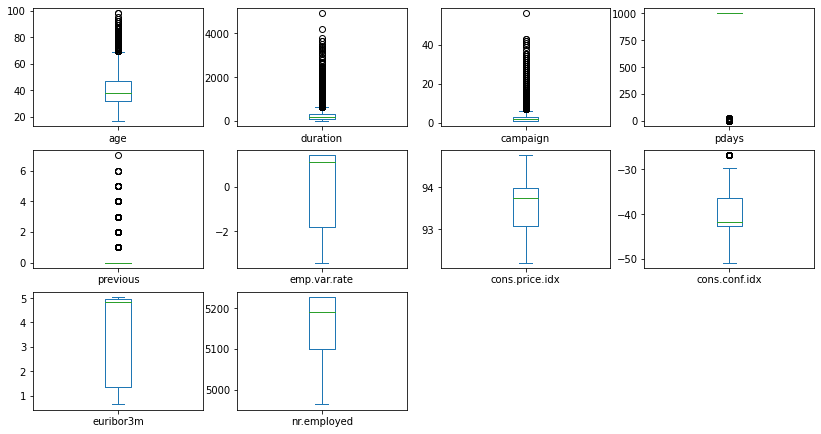

In [77]:
df.plot(figsize=(14,10), kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

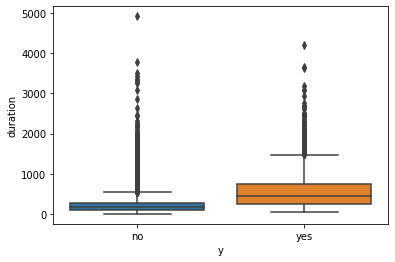

In [78]:
# Boxplot for duration
sns.boxplot(x = df["y"], y = df["duration"], data = df)

**Insight** - Higher is the duration of the last call, higher is the probability that the client will subscribe.

In [79]:
## Separate variable duration by the two values of the target
subscription_T = df[df["y"] == "yes"]["duration"]
subscription_F = df[df["y"] == "no"]["duration"]

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


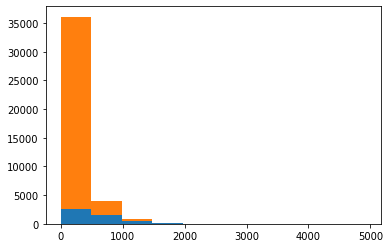

In [80]:
(n, bins, patches) = plt.hist([subscription_T, subscription_F], bins = 10, stacked = True)

Text(0, 0.5, 'Proportion')

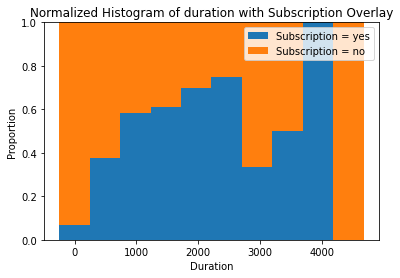

In [81]:
# Normalized values enhance pattern of subscription
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:,0])

plt.legend(['Subscription = yes', 'Subscription = no'])
plt.title('Normalized Histogram of duration with Subscription Overlay')
plt.xlabel('Duration')
plt.ylabel('Proportion')

**Insight** - Subscription declines steeply when the duration of call ends close to 50 min. However, the outcome is most certainly 'yes' if the duration is close to 65 min. and 'no' when the duration exceeds 65 minutes.

In [82]:
# Find unique values in pdays column
print(df['pdays'].unique())

[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


**Insight** - We can create buckets such as - pdays <= 10, 10 < pdays <= 20, 20 < pdays <= 30, pdays = 999     

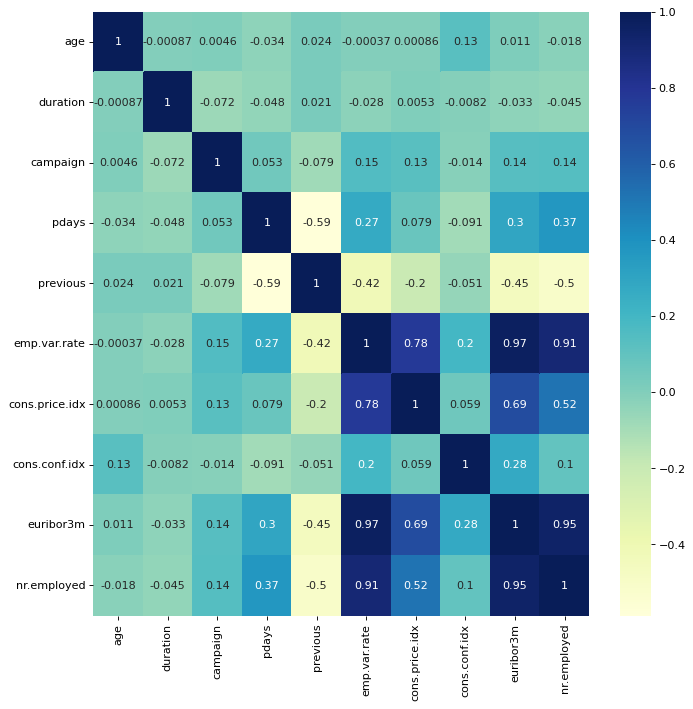

In [83]:
# Correlation Analysis
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

**Summary of Results for Numeric Variables** -
1. No Missing data values found in any of the numeric data columns
2. Uneven spread of values with high peaks and long tails

**Key Insights** - 
1. Higher is the duration of the last call, higher is the probability that the client will subscribe.
2. Subscription declines steeply when the duration of call ends close to 50 min. However, the outcome is most certainly 'yes' if the duration is close to 65 min. and 'no' when the duration exceeds 65 minutes.
3. The columns euribor3m, emp.var.rate, and nr.employed are highly correlated with each other. Thus, we can include just one of these variables rather than all of them. Since, cons.price.idx is least correlated with nr.employed compared to euribor3m and emp.var.rate, keep nr.employed and drop others.
